# <span style="color:darkblue"> Statistical plots </span>

<font size="5"> 

- When we have large amounts of data, we need methods to organize and present the information in a way that allows us to extract valuable insights from the data

- **Exploratory data analysis (EDA)** is the area of statistics aiming to explore, investigate and learn, as opposed to confirming statistical hypotheses 

- EDA involves using graphics and visualizations to explore and analyze data

- We focus on two types of variables when visualizing data:

    1. **Continuous variables:** take values on the real numbers --> there are infinite number of values between any two values. **Example:** time, weight, money, etc

    2. **Discrete variables:** variables that have a countable (finite) number of values between any two values. **Examples** number of drivers in F1 or the number of flaws or defects, etc
    
    - I include **categorical variables** (finite number of categories or distinct groups) as discrete variables. **Examples:** gender, nationality, etc

## <span style="color:darkblue"> Example: F1 Tables </span>

<font size="5"> 

- Let's look at the F1 ```results```, ```drivers``` and ```constructors``` tables and find some examples of continuous and discrete variables

In [ ]:
import pandas as pd

In [ ]:
results = pd.read_csv('data/results.csv')
drivers = pd.read_csv('data/drivers.csv')
constructors = pd.read_csv('data/constructors.csv')
races = pd.read_csv('data/races.csv')

In [ ]:
results.head()

In [ ]:
drivers.head()

In [ ]:
constructors.head()

In [ ]:
races.head()

<font size="5"> 

- **Continuous:** drivers age (based on dob), fastest lap, laps in milliseconds

- **Discrete:**  drivers and constructor nationalities, position in the race

## <span style="color:darkblue"> Types of plots for each variable type </span>

<font size="5"> 

- **Plots for continuous data:** distribution plots such as histograms, boxplots and violin plots

- **Plots for discrete data:** bars, lines, pies

## <span style="color:darkblue"> Example 1: distribution of the fastest laps by races </span>

<font size="5"> 

1. Start by analyzing only one race. Let's start by filtering the data for only the Monaco Grand Prix in 2021

In [ ]:
races[(races['name'] == 'Monaco Grand Prix') & (races['year']==2021)]

In [ ]:
monaco = results[results['raceId']==1056]

<font size="5"> 

2. Let's plot and interpret the histogram, boxplot and violin plot for the fastest laps in this Grand Prix

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 0, 'Fastest Lap in Monaco 2021')

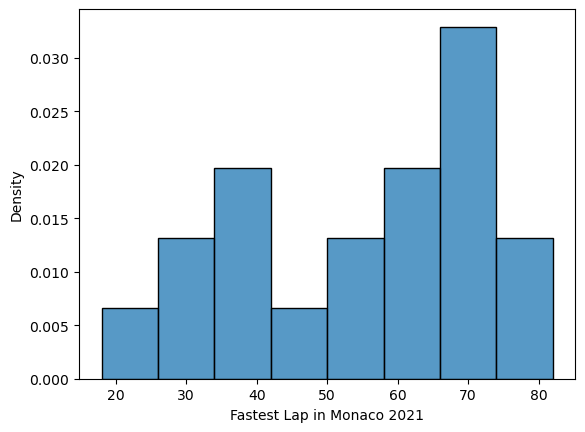

In [31]:
fig, ax = plt.subplots() 
sns.histplot(data=monaco, x='fastestLap', ax=ax, binwidth=8, stat='density')
ax.set_xlabel('Fastest Lap in Monaco 2021')
#https://seaborn.pydata.org/generated/seaborn.histplot.html

<AxesSubplot:xlabel='fastestLap'>

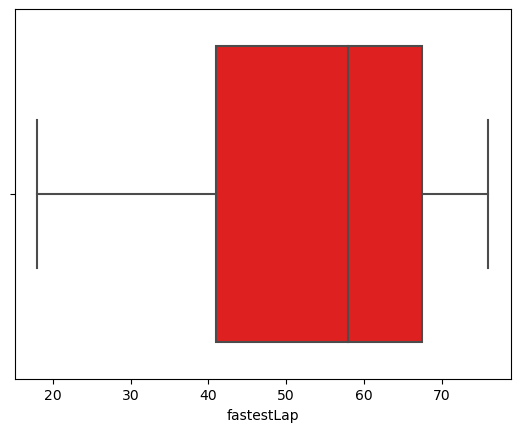

In [38]:
fig, ax = plt.subplots()
sns.boxplot(data=monaco, x='fastestLap', color='r')
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

**Violin plot:** https://seaborn.pydata.org/generated/seaborn.violinplot.html

<font size="5"> 

3. Can we compare fastest laps distributions for different races in the same year?

In [43]:
races_21 = list(races.loc[races['year']==2021, 'raceId'])

In [59]:
results_21 = results[results['raceId'].isin(races_21)]

<AxesSubplot:xlabel='fastestLap', ylabel='raceId'>

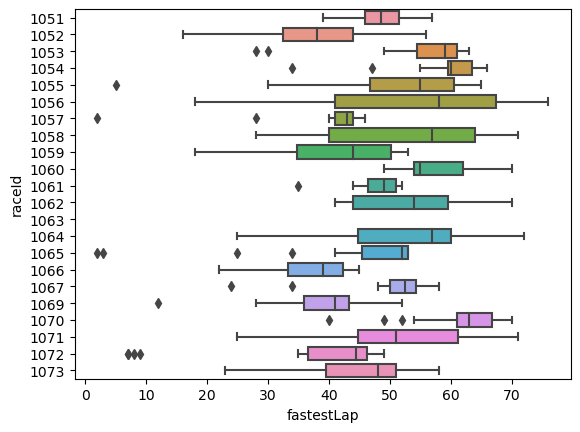

In [60]:
sns.boxplot(data=results_21, x='fastestLap', y = 'raceId', orient='h')

In [58]:
races.loc[races['raceId'].isin(races_21[0:5])]

,raceId,year,round,circuitId,name,date
1035,1053,2021,2,21,Emilia Romagna Grand Prix,4/18/2021
1037,1052,2021,1,3,Bahrain Grand Prix,3/28/2021
1038,1051,2021,20,78,Qatar Grand Prix,11/21/2021
1039,1054,2021,3,75,Portuguese Grand Prix,5/2/2021
1040,1055,2021,4,4,Spanish Grand Prix,5/9/2021


## <span style="color:darkblue"> Example 2: drivers' nationalities </span>

<font size="5"> 

- Create descriptive plots for the drivers nationalities 

<font size="5"> 

1. Crate a barplot with the number of drivers by nationality

In [67]:
nationalities = drivers[['driverId', 'nationality']].groupby('nationality', as_index=False).count()

In [69]:
nationalities.head()

,nationality,driverId
0,American,157
1,American-Italian,1
2,Argentine,24
3,Argentine-Italian,1
4,Australian,17


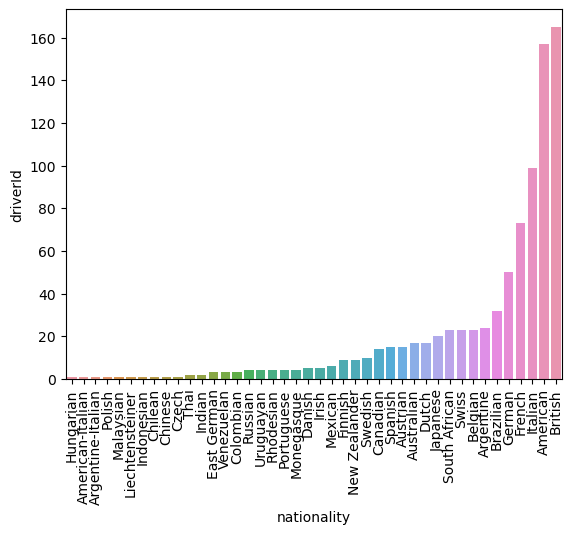

In [90]:
fig, ax = plt.subplots()
sns.barplot(data=nationalities.sort_values(by='driverId'), x='nationality', y='driverId', ax=ax)
ax.tick_params(axis='x', labelrotation = 90)

<font size="5"> 

2. Plot the evolution of the number of British pilots over time

In [91]:
drivers

,driverId,driverRef,number,code,forename,surname,dob,nationality
0,1,hamilton,44.0,HAM,Lewis,Hamilton,1/7/1985,British
1,2,heidfeld,NaN,HEI,Nick,Heidfeld,5/10/1977,German
2,3,rosberg,6.0,ROS,Nico,Rosberg,6/27/1985,German
3,4,alonso,14.0,ALO,Fernando,Alonso,7/29/1981,Spanish
4,5,kovalainen,NaN,KOV,Heikki,Kovalainen,10/19/1981,Finnish
...,...,...,...,...,...,...,...,...
849,851,aitken,89.0,AIT,Jack,Aitken,9/23/1995,British
850,852,tsunoda,22.0,TSU,Yuki,Tsunoda,5/11/2000,Japanese
851,853,mazepin,9.0,MAZ,Nikita,Mazepin,3/2/1999,Russian
852,854,mick_schumacher,47.0,MSC,Mick,Schumacher,3/22/1999,German


In [108]:
nationality_year = results[['raceId', 'driverId']].merge(drivers[['driverId', 'nationality']], on='driverId', how='left')
nationality_year = nationality_year.merge(races[['raceId', 'year']], on='raceId', how='left')

In [114]:
nationality_year = nationality_year[['driverId', 'nationality', 'year']].groupby(['nationality', 'year'], as_index=False).count()

In [117]:
british = nationality_year[nationality_year['nationality']=='British']

In [119]:
british

,nationality,year,driverId
274,British,1950,21
275,British,1951,18
276,British,1952,55
277,British,1953,51
278,British,1954,39
...,...,...,...
342,British,2018,21
343,British,2019,63
344,British,2020,51
345,British,2021,66


<AxesSubplot:xlabel='year', ylabel='driverId'>

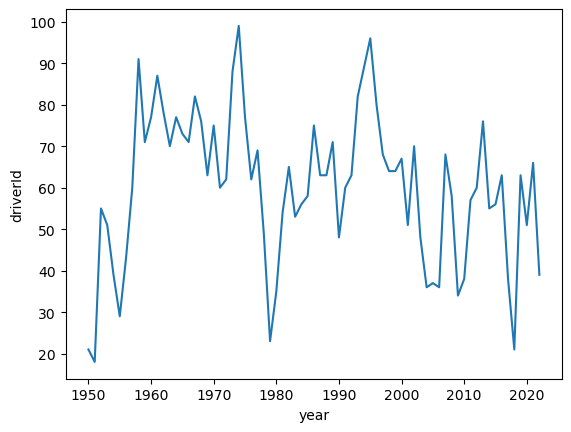

In [120]:
sns.lineplot(data=british, x = 'year', y='driverId')